# 101 Pandas Exercises for Data Analysis

## Index
#### 61. How to know the maximum possible correlation value of each column against other columns?
#### 62. How to create a column containing the minimum by maximum of each row?
#### 63. How to create a column that contains the penultimate value in each row?
#### 64. How to normalize all columns in a dataframe?
#### 65. How to compute the correlation of each row with the suceeding row?
#### 66. How to replace both the diagonals of dataframe with 0?
#### 67. How to get the particular group of a groupby dataframe by key?
#### 68. How to get the n’th largest value of a column when grouped by another column?
#### 69. How to compute grouped mean on pandas dataframe and keep the grouped column as another column (not index)?
#### 70. How to join two dataframes by 2 columns so they have only the common rows?


## 61. How to know the maximum possible correlation value of each column against other columns?

In [48]:
import pandas as pd
import numpy as np


In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
df = pd.DataFrame(np.random.randint(1,100, 80).reshape(8, -1), columns=list('pqrstuvwxy'), index=list('abcdefgh'))
df

,p,q,r,s,t,u,v,w,x,y
a,14,32,35,4,52,31,82,53,31,79
b,70,78,54,56,42,42,43,74,70,61
c,64,37,7,76,63,25,89,91,4,8
d,36,26,87,86,14,87,98,27,77,67
e,21,7,98,65,62,50,2,53,99,55
f,60,98,1,13,9,44,19,38,77,27
g,58,92,41,44,31,86,96,96,62,24
h,26,79,43,93,67,74,95,67,31,35


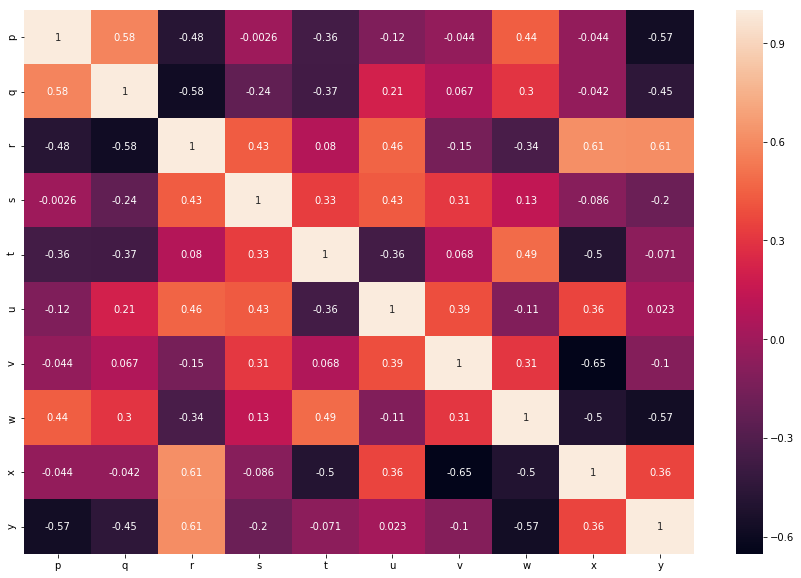

In [51]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [52]:
# Solution
abs_corrmat = np.abs(df.corr())
abs_corrmat

,p,q,r,s,t,u,v,w,x,y
p,1.000000,0.576928,0.479432,0.002633,0.361380,0.119209,0.043703,0.444687,0.044059,0.572733
q,0.576928,1.000000,0.575440,0.236493,0.365311,0.210816,0.067016,0.298887,0.041994,0.447471
r,0.479432,0.575440,1.000000,0.433188,0.079669,0.458939,0.151768,0.335043,0.614428,0.606992
s,0.002633,0.236493,0.433188,1.000000,0.334776,0.426639,0.311990,0.131821,0.086324,0.197573
t,0.361380,0.365311,0.079669,0.334776,1.000000,0.356702,0.068282,0.485471,0.495009,0.071160
u,0.119209,0.210816,0.458939,0.426639,0.356702,1.000000,0.391620,0.114129,0.358092,0.023074
v,0.043703,0.067016,0.151768,0.311990,0.068282,0.391620,1.000000,0.305129,0.652444,0.103693
w,0.444687,0.298887,0.335043,0.131821,0.485471,0.114129,0.305129,1.000000,0.498431,0.569102
x,0.044059,0.041994,0.614428,0.086324,0.495009,0.358092,0.652444,0.498431,1.000000,0.358303
y,0.572733,0.447471,0.606992,0.197573,0.071160,0.023074,0.103693,0.569102,0.358303,1.000000


In [53]:
max_corr = abs_corrmat.apply(lambda x: sorted(x)[-2])
max_corr

p    0.576928
q    0.576928
r    0.614428
s    0.433188
t    0.495009
u    0.458939
v    0.652444
w    0.569102
x    0.652444
y    0.606992
dtype: float64

In [54]:
print('Maximum Correlation possible for each column: ', np.round(max_corr.tolist(), 2))

Maximum Correlation possible for each column:  [0.58 0.58 0.61 0.43 0.5  0.46 0.65 0.57 0.65 0.61]


In [55]:
df = pd.read_csv('Cars93_miss.csv')
df.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25.0,31.0,None,Front,...,5.0,177.0,102.0,68.0,37.0,26.5,NaN,2705.0,non-USA,Acura Integra
1,NaN,Legend,Midsize,29.2,33.9,38.7,18.0,25.0,Driver & Passenger,Front,...,5.0,195.0,115.0,71.0,38.0,30.0,15.0,3560.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20.0,26.0,Driver only,Front,...,5.0,180.0,102.0,67.0,37.0,28.0,14.0,3375.0,non-USA,Audi 90
3,Audi,100,Midsize,NaN,37.7,44.6,19.0,26.0,Driver & Passenger,NaN,...,6.0,193.0,106.0,NaN,37.0,31.0,17.0,3405.0,non-USA,Audi 100
4,BMW,535i,Midsize,NaN,30.0,NaN,22.0,30.0,NaN,Rear,...,4.0,186.0,109.0,69.0,39.0,27.0,13.0,3640.0,non-USA,BMW 535i


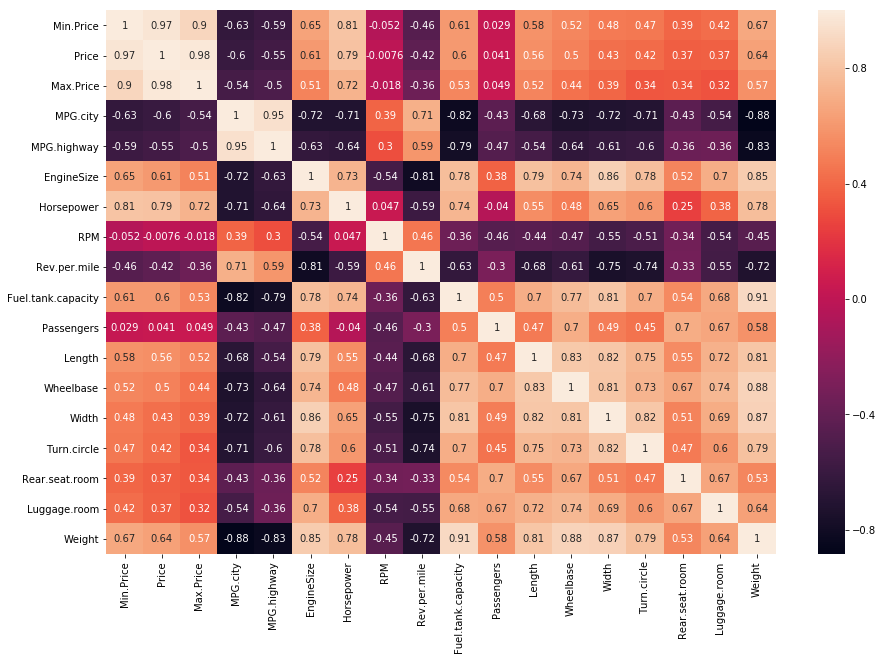

In [56]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [57]:
abs_corrmat2 = np.abs(df.corr())
abs_corrmat2

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
Min.Price,1.000000,0.970502,0.895937,0.626182,0.586501,0.651442,0.807519,0.051506,0.460744,0.609061,0.029214,0.577413,0.522891,0.476436,0.465782,0.390591,0.423905,0.673889
Price,0.970502,1.000000,0.980252,0.596479,0.554859,0.607286,0.794607,0.007644,0.422175,0.604777,0.040890,0.564704,0.500840,0.432279,0.415628,0.366097,0.369545,0.642563
Max.Price,0.895937,0.980252,1.000000,0.537724,0.503579,0.513480,0.724528,0.017815,0.356009,0.526891,0.049113,0.519279,0.435722,0.391288,0.335043,0.342768,0.318431,0.571150
MPG.city,0.626182,0.596479,0.537724,1.000000,0.947916,0.718253,0.714274,0.385401,0.709801,0.823445,0.430377,0.676105,0.733983,0.715643,0.705238,0.431462,0.541337,0.883119
MPG.highway,0.586501,0.554859,0.503579,0.947916,1.000000,0.625965,0.643573,0.304078,0.591147,0.785317,0.467672,0.538247,0.644664,0.611958,0.599979,0.363202,0.360388,0.832360
EngineSize,0.651442,0.607286,0.513480,0.718253,0.625965,1.000000,0.731327,0.543874,0.807026,0.778117,0.376861,0.790721,0.742088,0.862513,0.784953,0.518073,0.702213,0.845244
Horsepower,0.807519,0.794607,0.724528,0.714274,0.643573,0.731327,1.000000,0.047369,0.585919,0.741343,0.039870,0.552906,0.483922,0.646497,0.596148,0.247775,0.382684,0.777764
RPM,0.051506,0.007644,0.017815,0.385401,0.304078,0.543874,0.047369,1.000000,0.462331,0.355515,0.462703,0.443494,0.468348,0.546181,0.512642,0.338256,0.540402,0.452983
Rev.per.mile,0.460744,0.422175,0.356009,0.709801,0.591147,0.807026,0.585919,0.462331,1.000000,0.631850,0.301065,0.676693,0.612762,0.754254,0.735520,0.327909,0.551099,0.723885
Fuel.tank.capacity,0.609061,0.604777,0.526891,0.823445,0.785317,0.778117,0.741343,0.355515,0.631850,1.000000,0.496566,0.700491,0.766788,0.810474,0.703818,0.537124,0.682485,0.905157


In [58]:
abs_corrmat2.iloc[:,1]

Min.Price             0.970502
Price                 1.000000
Max.Price             0.980252
MPG.city              0.596479
MPG.highway           0.554859
EngineSize            0.607286
Horsepower            0.794607
RPM                   0.007644
Rev.per.mile          0.422175
Fuel.tank.capacity    0.604777
Passengers            0.040890
Length                0.564704
Wheelbase             0.500840
Width                 0.432279
Turn.circle           0.415628
Rear.seat.room        0.366097
Luggage.room          0.369545
Weight                0.642563
Name: Price, dtype: float64

In [59]:
sorted(abs_corrmat2.iloc[:,1])

[0.0076443537173176744,
 0.04088991406790286,
 0.3660965766969069,
 0.36954463600508497,
 0.4156283337371329,
 0.42217518986727604,
 0.4322791961110508,
 0.5008397827350028,
 0.5548589086638314,
 0.5647043814554793,
 0.5964785362417001,
 0.6047774716270297,
 0.6072858315281068,
 0.6425629251502097,
 0.7946070137996414,
 0.9705018025418044,
 0.9802518789921858,
 1.0]

In [60]:
sorted(abs_corrmat2.iloc[:,1])[-2]

0.9802518789921858

In [61]:
max_corr2 = abs_corrmat2.apply(lambda x: sorted(x)[-2])
max_corr2

Min.Price             0.970502
Price                 0.980252
Max.Price             0.980252
MPG.city              0.947916
MPG.highway           0.947916
EngineSize            0.862513
Horsepower            0.807519
RPM                   0.546181
Rev.per.mile          0.807026
Fuel.tank.capacity    0.905157
Passengers            0.702377
Length                0.827515
Wheelbase             0.880048
Width                 0.867648
Turn.circle           0.817055
Rear.seat.room        0.695034
Luggage.room          0.744772
Weight                0.905157
dtype: float64

In [62]:
print('Maximum Correlation possible for each column: ', np.round(max_corr2.tolist(), 2))

Maximum Correlation possible for each column:  [0.97 0.98 0.98 0.95 0.95 0.86 0.81 0.55 0.81 0.91 0.7  0.83 0.88 0.87
 0.82 0.7  0.74 0.91]


## 62. How to create a column containing the minimum by maximum of each row?

In [95]:
df = pd.DataFrame(np.random.randint(1, 100, 80).reshape(8, -1), columns = list('pqrstuvwxy'), index = list('abcdefgh'))
df

,p,q,r,s,t,u,v,w,x,y
a,97,30,40,99,46,60,58,22,4,25
b,44,14,76,52,13,41,28,51,56,77
c,68,77,31,27,1,98,56,54,56,41
d,53,21,89,74,81,81,92,45,79,85
e,48,43,74,38,10,99,21,40,82,48
f,64,13,42,67,29,41,95,90,97,24
g,85,75,48,86,5,83,60,72,23,52
h,88,71,54,3,60,49,76,54,30,42


In [96]:
# Solution 1
min_by_max = df.apply(lambda x: np.min(x)/np.max(x), axis=1)
df

,p,q,r,s,t,u,v,w,x,y
a,97,30,40,99,46,60,58,22,4,25
b,44,14,76,52,13,41,28,51,56,77
c,68,77,31,27,1,98,56,54,56,41
d,53,21,89,74,81,81,92,45,79,85
e,48,43,74,38,10,99,21,40,82,48
f,64,13,42,67,29,41,95,90,97,24
g,85,75,48,86,5,83,60,72,23,52
h,88,71,54,3,60,49,76,54,30,42


In [97]:
# Solution 2
min_by_max = np.min(df, axis=1)/np.max(df, axis=1)

In [98]:
df_min = df.loc[:,:].min(axis = 1)
df_min

a     4
b    13
c     1
d    21
e    10
f    13
g     5
h     3
dtype: int32

In [99]:
df_max = df.loc[:,:].max(axis = 1)
df_max

a    99
b    77
c    98
d    92
e    99
f    97
g    86
h    88
dtype: int32

In [100]:
df['MinbyMax'] = np.min(df, axis=1)/np.max(df, axis=1)
df

,p,q,r,s,t,u,v,w,x,y,MinbyMax
a,97,30,40,99,46,60,58,22,4,25,0.040404
b,44,14,76,52,13,41,28,51,56,77,0.168831
c,68,77,31,27,1,98,56,54,56,41,0.010204
d,53,21,89,74,81,81,92,45,79,85,0.228261
e,48,43,74,38,10,99,21,40,82,48,0.101010
f,64,13,42,67,29,41,95,90,97,24,0.134021
g,85,75,48,86,5,83,60,72,23,52,0.058140
h,88,71,54,3,60,49,76,54,30,42,0.034091


In [101]:
df['Min_Max'] = df_min/df_max
df

,p,q,r,s,t,u,v,w,x,y,MinbyMax,Min_Max
a,97,30,40,99,46,60,58,22,4,25,0.040404,0.040404
b,44,14,76,52,13,41,28,51,56,77,0.168831,0.168831
c,68,77,31,27,1,98,56,54,56,41,0.010204,0.010204
d,53,21,89,74,81,81,92,45,79,85,0.228261,0.228261
e,48,43,74,38,10,99,21,40,82,48,0.101010,0.101010
f,64,13,42,67,29,41,95,90,97,24,0.134021,0.134021
g,85,75,48,86,5,83,60,72,23,52,0.058140,0.058140
h,88,71,54,3,60,49,76,54,30,42,0.034091,0.034091


## 63. How to create a column that contains the penultimate value in each row?

In [114]:
df = pd.DataFrame(np.random.randint(10, 40, 60).reshape(-1, 4))
df

,0,1,2,3
0,13,15,39,21
1,21,28,18,10
2,36,16,17,17
3,30,25,32,35
4,31,11,20,24
5,24,17,20,20
6,12,24,13,26
7,24,35,27,29
8,10,16,35,22
9,15,37,25,37


In [115]:
ultimate = np.max(df, axis = 1)
ultimate

0     39
1     28
2     36
3     35
4     31
5     24
6     26
7     35
8     35
9     37
10    37
11    39
12    28
13    36
14    30
dtype: int32

In [116]:
df['Ultimate'] = ultimate
df

,0,1,2,3,Ultimate
0,13,15,39,21,39
1,21,28,18,10,28
2,36,16,17,17,36
3,30,25,32,35,35
4,31,11,20,24,31
5,24,17,20,20,24
6,12,24,13,26,26
7,24,35,27,29,35
8,10,16,35,22,35
9,15,37,25,37,37


In [117]:
# Solution 
out = df.apply(lambda x: x.sort_values().unique()[-2], axis=1)
df['Penultimate'] = out
print(df)

     0   1   2   3  Ultimate  Penultimate
0   13  15  39  21        39           21
1   21  28  18  10        28           21
2   36  16  17  17        36           17
3   30  25  32  35        35           32
4   31  11  20  24        31           24
5   24  17  20  20        24           20
6   12  24  13  26        26           24
7   24  35  27  29        35           29
8   10  16  35  22        35           22
9   15  37  25  37        37           25
10  22  37  22  30        37           30
11  17  39  14  32        39           32
12  14  11  18  28        28           18
13  23  21  36  14        36           23
14  17  30  30  24        30           24


## 64. How to normalize all columns in a dataframe?

#### Normalize all columns of df by subtracting the column mean and divide by standard deviation.
#### Range all columns of df such that the minimum value in each column is 0 and max is 1.

In [180]:
df = pd.read_csv('Cars93_miss.csv')
new_df = df.copy()
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 27 columns):
Manufacturer          89 non-null object
Model                 92 non-null object
Type                  90 non-null object
Min.Price             86 non-null float64
Price                 91 non-null float64
Max.Price             88 non-null float64
MPG.city              84 non-null float64
MPG.highway           91 non-null float64
AirBags               87 non-null object
DriveTrain            86 non-null object
Cylinders             88 non-null object
EngineSize            91 non-null float64
Horsepower            86 non-null float64
RPM                   90 non-null float64
Rev.per.mile          87 non-null float64
Man.trans.avail       88 non-null object
Fuel.tank.capacity    85 non-null float64
Passengers            91 non-null float64
Length                89 non-null float64
Wheelbase             92 non-null float64
Width                 87 non-null float64
Turn.circle           

In [181]:
new_df.columns

Index(['Manufacturer', 'Model', 'Type', 'Min.Price', 'Price', 'Max.Price',
       'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Man.trans.avail',
       'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight', 'Origin',
       'Make'],
      dtype='object')

In [182]:
num_df = new_df[['Min.Price', 'Price', 'Max.Price',
       'MPG.city', 'MPG.highway', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight']]
num_df.head()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
0,12.9,15.9,18.8,25.0,31.0,1.8,140.0,6300.0,2890.0,13.2,5.0,177.0,102.0,68.0,37.0,26.5,NaN,2705.0
1,29.2,33.9,38.7,18.0,25.0,3.2,200.0,5500.0,2335.0,18.0,5.0,195.0,115.0,71.0,38.0,30.0,15.0,3560.0
2,25.9,29.1,32.3,20.0,26.0,2.8,172.0,5500.0,2280.0,16.9,5.0,180.0,102.0,67.0,37.0,28.0,14.0,3375.0
3,NaN,37.7,44.6,19.0,26.0,NaN,172.0,5500.0,2535.0,21.1,6.0,193.0,106.0,NaN,37.0,31.0,17.0,3405.0
4,NaN,30.0,NaN,22.0,30.0,3.5,208.0,5700.0,2545.0,21.1,4.0,186.0,109.0,69.0,39.0,27.0,13.0,3640.0


In [183]:
num_df.mean()

Min.Price               17.118605
Price                   19.616484
Max.Price               21.459091
MPG.city                22.404762
MPG.highway             29.065934
EngineSize               2.658242
Horsepower             144.000000
RPM                   5276.666667
Rev.per.mile          2355.000000
Fuel.tank.capacity      16.683529
Passengers               5.076923
Length                 182.865169
Wheelbase              103.956522
Width                   69.448276
Turn.circle             38.954545
Rear.seat.room          27.853933
Luggage.room            13.986486
Weight                3104.593023
dtype: float64

In [184]:
num_df.std()

Min.Price               8.828290
Price                   9.724280
Max.Price              10.696563
MPG.city                5.841520
MPG.highway             5.370293
EngineSize              1.045845
Horsepower             53.455204
RPM                   605.554811
Rev.per.mile          486.916616
Fuel.tank.capacity      3.375748
Passengers              1.045953
Length                 14.792651
Wheelbase               6.856317
Width                   3.778023
Turn.circle             3.304157
Rear.seat.room          3.018129
Luggage.room            3.120824
Weight                600.129993
dtype: float64

In [185]:
NEW_df = (num_df - num_df.mean())/ num_df.std()
NEW_df.head()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
0,-0.477851,-0.382186,-0.248593,0.444274,0.360142,-0.820620,-0.074829,1.689910,1.098751,-1.031928,-0.073544,-0.396492,-0.285360,-0.383342,-0.591541,-0.448600,NaN,-0.665844
1,1.368486,1.468851,1.611818,-0.754044,-0.757116,0.518010,1.047606,0.368808,-0.041075,0.389979,-0.073544,0.820328,1.610701,0.410724,-0.288892,0.711059,0.324758,0.758847
2,0.994688,0.975241,1.013495,-0.411667,-0.570906,0.135544,0.523803,0.368808,-0.154030,0.064125,-0.073544,-0.193689,-0.285360,-0.648031,-0.591541,0.048397,0.004330,0.450581
3,NaN,1.859625,2.163397,-0.582856,-0.570906,NaN,0.523803,0.368808,0.369673,1.308294,0.882523,0.685126,0.298043,NaN,-0.591541,1.042390,0.965615,0.500570
4,NaN,1.067793,NaN,-0.069291,0.173932,0.804859,1.197264,0.699083,0.390211,1.308294,-1.029610,0.211918,0.735596,-0.118654,0.013757,-0.282934,-0.316098,0.892152


In [186]:
NEW_df.shape

(93, 18)

In [187]:
NEW_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Min.Price,86.0,1.290957e-18,1.0,-1.180138,-0.712891,-0.285288,0.354700,3.203496
Price,91.0,7.808162e-17,1.0,-1.256287,-0.747252,-0.197082,0.399363,4.348242
Max.Price,88.0,-8.301440e-16,1.0,-1.267612,-0.643580,-0.215872,0.314672,5.472871
MPG.city,84.0,-7.004979e-17,1.0,-1.267609,-0.754044,-0.240479,0.444274,4.039230
MPG.highway,91.0,3.111065e-17,1.0,-1.688164,-0.570906,-0.198487,0.360142,3.898123
EngineSize,91.0,-5.163757e-16,1.0,-1.585552,-0.820620,-0.342538,0.565818,2.908421
Horsepower,86.0,-3.614680e-17,1.0,-1.664945,-0.809089,-0.074829,0.486389,2.918331
RPM,90.0,-4.268191e-16,1.0,-2.438535,-0.787157,-0.126606,0.843579,2.020186
Rev.per.mile,87.0,-7.018651e-18,1.0,-2.125621,-0.693137,0.010269,0.431285,2.875236
Fuel.tank.capacity,85.0,-1.129815e-15,1.0,-2.216850,-0.646828,-0.054367,0.686209,3.056054


In [188]:
NEW = NEW_df[(NEW_df >= 0) & (NEW_df <= 1)]
NEW.head(10)

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
0,NaN,NaN,NaN,0.444274,0.360142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,0.518010,NaN,0.368808,NaN,0.389979,NaN,0.820328,NaN,0.410724,NaN,0.711059,0.324758,0.758847
2,0.994688,0.975241,NaN,NaN,NaN,0.135544,0.523803,0.368808,NaN,0.064125,NaN,NaN,NaN,NaN,NaN,0.048397,0.004330,0.450581
3,NaN,NaN,NaN,NaN,NaN,NaN,0.523803,0.368808,0.369673,NaN,0.882523,0.685126,0.298043,NaN,NaN,NaN,0.965615,0.500570
4,NaN,NaN,NaN,NaN,0.173932,0.804859,NaN,0.699083,0.390211,NaN,NaN,0.211918,0.735596,NaN,0.013757,NaN,NaN,0.892152
5,NaN,NaN,NaN,NaN,0.360142,NaN,NaN,NaN,0.431285,NaN,0.882523,0.414722,0.152192,NaN,0.619055,0.048397,0.645187,NaN
6,0.315055,0.121707,NaN,NaN,NaN,NaN,0.486389,NaN,NaN,NaN,0.882523,NaN,NaN,NaN,0.921704,0.876724,0.965615,0.608880
7,0.620890,0.419930,0.321684,NaN,NaN,NaN,0.673461,NaN,NaN,NaN,0.882523,NaN,NaN,NaN,NaN,0.876724,NaN,NaN
8,NaN,0.687302,0.452567,NaN,NaN,NaN,0.486389,NaN,NaN,0.626963,NaN,NaN,0.589745,NaN,0.619055,NaN,0.004330,0.650537
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.389979,0.882523,NaN,NaN,0.940101,NaN,NaN,NaN,0.858826


In [190]:
NEW2 = (NEW_df.max()-NEW_df)/(NEW_df.max()-NEW_df.min())
NEW2.head()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
0,0.839793,0.844037,0.848821,0.677419,0.633333,0.829787,0.653061,0.074074,0.355236,0.775281,0.500000,0.538462,0.586207,0.555556,0.615385,0.558824,NaN,0.580913
1,0.418605,0.513761,0.572816,0.903226,0.833333,0.531915,0.408163,0.370370,0.583162,0.505618,0.500000,0.307692,0.137931,0.388889,0.538462,0.352941,0.4375,0.226141
2,0.503876,0.601835,0.661581,0.838710,0.800000,0.617021,0.522449,0.370370,0.605749,0.567416,0.500000,0.500000,0.586207,0.611111,0.615385,0.470588,0.5000,0.302905
3,NaN,0.444037,0.490985,0.870968,0.800000,NaN,0.522449,0.370370,0.501027,0.331461,0.333333,0.333333,0.448276,NaN,0.615385,0.294118,0.3125,0.290456
4,NaN,0.585321,NaN,0.774194,0.666667,0.468085,0.375510,0.296296,0.496920,0.331461,0.666667,0.423077,0.344828,0.500000,0.461538,0.529412,0.5625,0.192946


In [191]:
NEW2.describe().T

,count,mean,std,min,25%,50%,75%,max
Min.Price,86.0,0.730785,0.228121,0.0,0.649871,0.795866,0.893411,1.0
Price,91.0,0.775844,0.178427,0.0,0.704587,0.811009,0.909174,1.0
Max.Price,88.0,0.811940,0.148357,0.0,0.765257,0.843967,0.907420,1.0
MPG.city,84.0,0.761137,0.188436,0.0,0.677419,0.806452,0.903226,1.0
MPG.highway,91.0,0.697802,0.179010,0.0,0.633333,0.733333,0.800000,1.0
EngineSize,91.0,0.647183,0.222520,0.0,0.521277,0.723404,0.829787,1.0
Horsepower,86.0,0.636735,0.218185,0.0,0.530612,0.653061,0.813265,1.0
RPM,90.0,0.453086,0.224280,0.0,0.263889,0.481481,0.629630,1.0
Rev.per.mile,87.0,0.574949,0.199966,0.0,0.488706,0.572895,0.713552,1.0
Fuel.tank.capacity,85.0,0.579577,0.189649,0.0,0.449438,0.589888,0.702247,1.0


In [192]:
# Solution 2
df = pd.DataFrame(np.random.randint(1,100, 80).reshape(8, -1))
df

,0,1,2,3,4,5,6,7,8,9
0,38,47,70,12,87,38,1,23,76,32
1,67,35,65,3,3,78,62,44,9,30
2,53,26,45,77,21,62,50,98,3,75
3,15,2,91,4,2,83,18,76,65,58
4,42,53,26,8,60,91,30,36,48,59
5,67,54,40,84,4,25,33,17,13,90
6,89,38,62,85,59,57,92,37,13,7
7,85,96,54,60,76,65,37,45,61,35


In [193]:
# Solution Q1
out1 = df.apply(lambda x: ((x - x.mean())/x.std()).round(2))
print('Solution Q1\n',out1)


Solution Q1
       0     1     2     3     4     5     6     7     8     9
0 -0.76  0.12  0.67 -0.78  1.36 -1.09 -1.41 -0.88  1.36 -0.60
1  0.40 -0.33  0.42 -1.01 -1.02  0.70  0.78 -0.11 -0.92 -0.67
2 -0.16 -0.66 -0.58  0.93 -0.51 -0.02  0.34  1.88 -1.12  0.99
3 -1.68 -1.55  1.71 -0.99 -1.05  0.92 -0.80  1.07  0.98  0.36
4 -0.60  0.34 -1.53 -0.88  0.59  1.28 -0.37 -0.41  0.41  0.40
5  0.40  0.38 -0.83  1.11 -0.99 -1.67 -0.26 -1.11 -0.78  1.54
6  1.28 -0.22  0.27  1.14  0.57 -0.24  1.85 -0.37 -0.78 -1.52
7  1.12  1.93 -0.13  0.48  1.05  0.12 -0.12 -0.07  0.85 -0.49


In [194]:
out1.describe().T

,count,mean,std,min,25%,50%,75%,max
0,8.0,-2.775558e-17,0.999886,-1.68,-0.6400,0.120,0.5800,1.28
1,8.0,1.250000e-03,0.999620,-1.55,-0.4125,-0.050,0.3500,1.93
2,8.0,2.775558e-17,1.000386,-1.53,-0.6425,0.070,0.4825,1.71
3,8.0,0.000000e+00,1.000714,-1.01,-0.9075,-0.150,0.9750,1.14
4,8.0,-2.775558e-17,1.000586,-1.05,-0.9975,0.030,0.7050,1.36
5,8.0,1.387779e-17,1.001727,-1.67,-0.4525,0.050,0.7550,1.28
6,8.0,1.250000e-03,0.999535,-1.41,-0.4775,-0.190,0.4500,1.85
7,8.0,-6.938894e-18,1.000557,-1.11,-0.5275,-0.240,0.2150,1.88
8,8.0,-1.387779e-17,1.001299,-1.12,-0.8150,-0.185,0.8825,1.36
9,8.0,1.250000e-03,1.000049,-1.52,-0.6175,-0.065,0.5475,1.54


In [195]:
# Solution Q2
out2 = df.apply(lambda x: ((x.max() - x)/(x.max() - x.min())).round(2))
print('Solution Q2\n', out2)  

Solution Q2
       0     1     2     3     4     5     6     7     8     9
0  0.69  0.52  0.32  0.89  0.00  0.80  1.00  0.93  0.00  0.70
1  0.30  0.65  0.40  1.00  0.99  0.20  0.33  0.67  0.92  0.72
2  0.49  0.74  0.71  0.10  0.78  0.44  0.46  0.00  1.00  0.18
3  1.00  1.00  0.00  0.99  1.00  0.12  0.81  0.27  0.15  0.39
4  0.64  0.46  1.00  0.94  0.32  0.00  0.68  0.77  0.38  0.37
5  0.30  0.45  0.78  0.01  0.98  1.00  0.65  1.00  0.86  0.00
6  0.00  0.62  0.45  0.00  0.33  0.52  0.00  0.75  0.86  1.00
7  0.05  0.00  0.57  0.30  0.13  0.39  0.60  0.65  0.21  0.66


In [196]:
out2.describe().T

,count,mean,std,min,25%,50%,75%,max
0,8.0,0.43375,0.338735,0.0,0.2375,0.395,0.6525,1.0
1,8.0,0.55500,0.286556,0.0,0.4575,0.570,0.6725,1.0
2,8.0,0.52875,0.308380,0.0,0.3800,0.510,0.7275,1.0
3,8.0,0.52875,0.465877,0.0,0.0775,0.595,0.9525,1.0
4,8.0,0.56625,0.416102,0.0,0.2725,0.555,0.9825,1.0
5,8.0,0.43375,0.339198,0.0,0.1800,0.415,0.5900,1.0
6,8.0,0.56625,0.306218,0.0,0.4275,0.625,0.7125,1.0
7,8.0,0.63000,0.335815,0.0,0.5550,0.710,0.8100,1.0
8,8.0,0.54750,0.403299,0.0,0.1950,0.620,0.8750,1.0
9,8.0,0.50250,0.326311,0.0,0.3225,0.525,0.7050,1.0


## 65. How to compute the correlation of each row with the suceeding row?

In [197]:
df = pd.DataFrame(np.random.randint(1,100, 80).reshape(8, -1))
df

,0,1,2,3,4,5,6,7,8,9
0,24,52,8,76,24,5,35,4,39,72
1,51,97,78,42,21,74,58,48,49,50
2,19,53,50,68,38,16,79,53,77,2
3,79,38,33,20,81,8,40,89,42,71
4,9,5,44,56,86,52,4,1,47,24
5,42,69,66,82,36,80,25,44,57,46
6,7,87,38,88,11,80,8,74,26,82
7,75,70,53,25,72,27,49,28,20,92


In [198]:
# Solution
[df.iloc[i].corr(df.iloc[i+1]).round(2) for i in range(df.shape[0])[:-1]]

[-0.11, 0.0, -0.27, -0.23, 0.3, 0.68, -0.16]

In [202]:
a = df.iloc[:1,:]
b = df.iloc[1:2, :]
c = df.iloc[2:3, :]
np.corrcoef(a,b)

array([[ 1.        , -0.11238359],
       [-0.11238359,  1.        ]])

## 66. How to replace both the diagonals of dataframe with 0?

In [203]:
df = pd.DataFrame(np.random.randint(1,100, 100).reshape(10, -1))
df

,0,1,2,3,4,5,6,7,8,9
0,25,23,78,31,80,88,34,25,73,23
1,59,58,92,71,57,46,56,20,44,32
2,34,83,10,37,94,2,41,79,69,22
3,31,88,74,59,63,3,72,43,80,39
4,23,80,33,69,13,87,12,32,4,83
5,52,93,97,98,85,8,51,76,21,63
6,64,67,20,25,92,21,24,3,9,83
7,74,37,16,16,88,18,56,3,40,96
8,55,2,69,35,89,79,64,97,23,73
9,66,80,45,20,9,74,23,79,49,90


In [204]:
# Solution
for i in range(df.shape[0]):
    df.iat[i, i] = 0
    df.iat[df.shape[0]-i-1, i] = 0

In [206]:
df

,0,1,2,3,4,5,6,7,8,9
0,0,23,78,31,80,88,34,25,73,0
1,59,0,92,71,57,46,56,20,0,32
2,34,83,0,37,94,2,41,0,69,22
3,31,88,74,0,63,3,0,43,80,39
4,23,80,33,69,0,0,12,32,4,83
5,52,93,97,98,0,0,51,76,21,63
6,64,67,20,0,92,21,0,3,9,83
7,74,37,0,16,88,18,56,0,40,96
8,55,0,69,35,89,79,64,97,0,73
9,0,80,45,20,9,74,23,79,49,0


##  67. How to get the particular group of a groupby dataframe by key?

In [213]:
df = pd.DataFrame({'col1': ['apple', 'banana', 'orange'] * 3,
                   'col2': np.random.rand(9),
                   'col3': np.random.randint(0, 15, 9)})

df_grouped = df.groupby(['col1'])
df

,col1,col2,col3
0,apple,0.104472,7
1,banana,0.631924,4
2,orange,0.750576,5
3,apple,0.309304,9
4,banana,0.263447,3
5,orange,0.804207,2
6,apple,0.026394,14
7,banana,0.696576,1
8,orange,0.487574,8


In [212]:
# Solution 1
df_grouped.get_group('apple')


,col1,col2,col3
0,apple,0.521729,0
3,apple,0.548966,4
6,apple,0.109531,6


In [214]:
# Solution 2
for i, dff in df_grouped:
    if i == 'apple':
        print(dff)

    col1      col2  col3
0  apple  0.104472     7
3  apple  0.309304     9
6  apple  0.026394    14


In [219]:
df = pd.read_csv('Cars93_miss.csv')
df.head(100)

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25.0,31.0,None,Front,...,5.0,177.0,102.0,68.0,37.0,26.5,NaN,2705.0,non-USA,Acura Integra
1,NaN,Legend,Midsize,29.2,33.9,38.7,18.0,25.0,Driver & Passenger,Front,...,5.0,195.0,115.0,71.0,38.0,30.0,15.0,3560.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20.0,26.0,Driver only,Front,...,5.0,180.0,102.0,67.0,37.0,28.0,14.0,3375.0,non-USA,Audi 90
3,Audi,100,Midsize,NaN,37.7,44.6,19.0,26.0,Driver & Passenger,NaN,...,6.0,193.0,106.0,NaN,37.0,31.0,17.0,3405.0,non-USA,Audi 100
4,BMW,535i,Midsize,NaN,30.0,NaN,22.0,30.0,NaN,Rear,...,4.0,186.0,109.0,69.0,39.0,27.0,13.0,3640.0,non-USA,BMW 535i
5,Buick,Century,Midsize,14.2,15.7,17.3,22.0,31.0,Driver only,NaN,...,6.0,189.0,105.0,69.0,41.0,28.0,16.0,NaN,USA,Buick Century
6,Buick,LeSabre,Large,19.9,20.8,NaN,19.0,28.0,Driver only,Front,...,6.0,200.0,111.0,74.0,42.0,30.5,17.0,3470.0,USA,Buick LeSabre
7,Buick,Roadmaster,Large,22.6,23.7,24.9,16.0,25.0,Driver only,Rear,...,6.0,216.0,116.0,78.0,45.0,30.5,21.0,4105.0,USA,Buick Roadmaster
8,Buick,Riviera,Midsize,26.3,26.3,26.3,19.0,27.0,Driver only,Front,...,5.0,198.0,108.0,NaN,41.0,26.5,14.0,3495.0,USA,Buick Riviera
9,Cadillac,DeVille,Large,33.0,34.7,36.3,16.0,25.0,Driver only,Front,...,6.0,206.0,114.0,73.0,43.0,35.0,18.0,3620.0,USA,Cadillac DeVille


In [216]:
df_model = df.groupby('Manufacturer')
df_model.get_group('Audi')

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
2,Audi,90,Compact,25.9,29.1,32.3,20.0,26.0,Driver only,Front,...,5.0,180.0,102.0,67.0,37.0,28.0,14.0,3375.0,non-USA,Audi 90
3,Audi,100,Midsize,NaN,37.7,44.6,19.0,26.0,Driver & Passenger,NaN,...,6.0,193.0,106.0,NaN,37.0,31.0,17.0,3405.0,non-USA,Audi 100


In [220]:
df_model.get_group('Volkswagen')

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
87,Volkswagen,Fox,Small,8.7,9.1,9.5,25.0,33.0,None,Front,...,4.0,163.0,93.0,63.0,34.0,26.0,10.0,2240.0,non-USA,Volkswagen Fox
88,Volkswagen,Eurovan,Van,16.6,19.7,22.7,17.0,21.0,None,Front,...,7.0,187.0,115.0,72.0,38.0,34.0,NaN,3960.0,NaN,Volkswagen Eurovan
89,Volkswagen,Passat,Compact,17.6,20.0,22.4,21.0,30.0,None,Front,...,5.0,180.0,103.0,67.0,35.0,31.5,14.0,2985.0,non-USA,Volkswagen Passat
90,Volkswagen,Corrado,Sporty,22.9,23.3,23.7,18.0,25.0,None,Front,...,4.0,159.0,97.0,66.0,36.0,26.0,15.0,2810.0,non-USA,Volkswagen Corrado


In [226]:
df_model2 = df.groupby('Passengers')
df_model2.get_group(7)

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
15,Chevrolet,Lumina_APV,Van,14.7,16.3,18.0,18.0,23.0,None,Front,...,7.0,178.0,110.0,74.0,44.0,30.5,NaN,3715.0,USA,Chevrolet Lumina_APV
25,Dodge,Caravan,Van,NaN,19.0,24.4,17.0,21.0,Driver only,4WD,...,7.0,175.0,112.0,72.0,42.0,26.5,NaN,3705.0,USA,Dodge Caravan
35,Ford,Aerostar,Van,14.5,19.9,25.3,15.0,20.0,Driver only,4WD,...,7.0,176.0,119.0,72.0,45.0,30.0,NaN,3735.0,USA,Ford Aerostar
55,Mazda,MPV,Van,16.6,19.1,21.7,18.0,24.0,None,4WD,...,7.0,190.0,110.0,72.0,39.0,27.5,NaN,3735.0,non-USA,Mazda MPV
65,Nissan,Quest,Van,16.7,19.1,21.5,17.0,23.0,None,Front,...,7.0,190.0,112.0,74.0,41.0,27.0,NaN,4100.0,non-USA,Nissan Quest
69,Oldsmobile,Silhouette,Van,19.5,19.5,19.5,18.0,23.0,None,Front,...,7.0,NaN,110.0,74.0,44.0,30.5,NaN,3715.0,USA,Oldsmobile Silhouette
86,Toyota,Previa,Van,NaN,22.7,26.6,18.0,22.0,Driver only,4WD,...,7.0,187.0,113.0,71.0,41.0,35.0,NaN,3785.0,non-USA,Toyota Previa
88,Volkswagen,Eurovan,Van,16.6,19.7,22.7,17.0,21.0,None,Front,...,7.0,187.0,115.0,72.0,38.0,34.0,NaN,3960.0,NaN,Volkswagen Eurovan


## 68. How to get the n’th largest value of a column when grouped by another column?

In [234]:
df = pd.DataFrame({'fruit': ['apple', 'banana', 'orange'] * 3,
                   'taste': np.random.rand(9),
                   'price': np.random.randint(0, 15, 9)})
df

,fruit,taste,price
0,apple,0.353706,4
1,banana,0.569326,2
2,orange,0.608576,4
3,apple,0.923184,4
4,banana,0.326605,2
5,orange,0.548848,2
6,apple,0.175396,14
7,banana,0.212738,14
8,orange,0.181128,12


In [237]:
# Solution
df_grpd = df['taste'].groupby(df.fruit)
df_grpd

In [240]:
df_grpd.get_group('banana')

1    0.569326
4    0.326605
7    0.212738
Name: taste, dtype: float64

In [239]:
df_grpd.get_group('banana').sort_values()

7    0.212738
4    0.326605
1    0.569326
Name: taste, dtype: float64

In [238]:
df_grpd.get_group('banana').sort_values().iloc[-2]

0.3266046131652488

## 69. How to compute grouped mean on pandas dataframe and keep the grouped column as another column (not index)?

In [241]:
#In df, Compute the mean price of every fruit, while keeping the fruit as another column instead of an index.

In [243]:
df = pd.DataFrame({'fruit': ['apple', 'banana', 'orange'] * 3,
                   'rating': np.random.rand(9),
                   'price': np.random.randint(0, 15, 9)})
df

,fruit,rating,price
0,apple,0.831164,6
1,banana,0.321227,3
2,orange,0.207507,5
3,apple,0.587220,2
4,banana,0.085984,13
5,orange,0.395708,4
6,apple,0.778514,10
7,banana,0.458356,5
8,orange,0.903027,0


In [255]:
df.groupby('fruit').mean()

,rating,price
fruit,,
apple,0.732299,6
banana,0.288522,7
orange,0.502080,3


In [254]:
# Solution
out = df.groupby('fruit', as_index=False)['price'].mean()
print(out)

    fruit  price
0   apple      6
1  banana      7
2  orange      3


## 70. How to join two dataframes by 2 columns so they have only the common rows?

In [257]:
df1 = pd.DataFrame(np.random.randint(1,100, 40).reshape(10, -1), columns=list('pqrs'), index=list('abcdefghij'))
df1

,p,q,r,s
a,63,69,22,88
b,35,74,85,92
c,41,80,4,74
d,40,15,4,25
e,49,81,3,86
f,19,74,17,69
g,7,22,48,64
h,80,95,98,93
i,45,83,1,99
j,5,46,55,28


In [262]:
df2 = pd.DataFrame(np.random.randint(100,200, 40).reshape(10, -1), columns=list('uvwx'), index=list('abcdefghij'))
df2

,u,v,w,x
a,113,171,180,180
b,155,194,198,140
c,115,100,143,106
d,157,190,107,196
e,197,148,191,194
f,111,182,139,140
g,184,105,157,154
h,176,132,105,149
i,164,165,170,157
j,117,128,102,189


In [263]:
df1.join(df2,how = 'left')

,p,q,r,s,u,v,w,x
a,63,69,22,88,113,171,180,180
b,35,74,85,92,155,194,198,140
c,41,80,4,74,115,100,143,106
d,40,15,4,25,157,190,107,196
e,49,81,3,86,197,148,191,194
f,19,74,17,69,111,182,139,140
g,7,22,48,64,184,105,157,154
h,80,95,98,93,176,132,105,149
i,45,83,1,99,164,165,170,157
j,5,46,55,28,117,128,102,189


In [264]:
# Input
df1 = pd.DataFrame({'fruit': ['apple', 'banana', 'orange'] * 3,
                    'weight': ['high', 'medium', 'low'] * 3,
                    'price': np.random.randint(0, 15, 9)})

df1

,fruit,weight,price
0,apple,high,3
1,banana,medium,5
2,orange,low,12
3,apple,high,6
4,banana,medium,11
5,orange,low,14
6,apple,high,11
7,banana,medium,3
8,orange,low,11


In [265]:
df2 = pd.DataFrame({'pazham': ['apple', 'orange', 'pine'] * 2,
                    'kilo': ['high', 'low'] * 3,
                    'price': np.random.randint(0, 15, 6)})
df2

,pazham,kilo,price
0,apple,high,3
1,orange,low,11
2,pine,high,10
3,apple,low,6
4,orange,high,14
5,pine,low,8


In [267]:
# Solution
pd.merge(df1, df2, how='inner', left_on=['fruit', 'weight'], right_on=['pazham', 'kilo'], suffixes=['_left', '_right'])

,fruit,weight,price_left,pazham,kilo,price_right
0,apple,high,3,apple,high,3
1,apple,high,6,apple,high,3
2,apple,high,11,apple,high,3
3,orange,low,12,orange,low,11
4,orange,low,14,orange,low,11
5,orange,low,11,orange,low,11
